In [1]:
import numpy as np
import math 
import bitarray
from math import *
from matplotlib import pyplot as plt

In [2]:
f_s = 22050
T_s = 1/f_s
sigma = 0.05


#x the basis number
def basis(x,t):
    if x >T and x<=(1+T) : 
        return value
    
def r(t) :
    return sinc(t)

def basis_rect(t) :
    return 

# Basics : Fourier transform, Root-Raised Cosine Basis, Shift in Frequency

In [3]:
def fourier_transform(x, start, end):
    nb_coef = end - start
    result = np.zeros(nb_coef)
    n = np.arange(x.shape[0])
    for f in np.arange(start, end):
        result[f - start] = np.abs(np.sum(x/f_s * np.exp(-2*1j*pi* f * (n/f_s))))
    
    return result

In [4]:
def low_pass(arr, f_0):
    T = 2*f_0
    t = np.arange(-200,200)/f_s
    sinc = T * np.sinc(T*t)
    
    return np.convolve(arr/f_s, sinc, mode = 'same')

def low_pass_2(arr, f_0):
    return np.convolve(rand_a, root_raised_12_Ts_rescaled, mode = 'same')

In [5]:
def shift(arr, f_0):
    indices = np.arange(arr.shape[0])
    return (arr * np.sqrt(2) * np.exp(1j * 2 * pi * f_0 * indices/f_s))/np.sqrt(2)

In [6]:
B = 0.8
T = 2

def root_raised_cos(t, T):
    if t == np.abs(T/(4*B)) : 
        return B/(pi*sqrt(2*T)) * ((pi + 2)*np.sin(pi/(4*B)) + (pi - 2)*cos(pi/(4*B)))
    else :
        return 4*B / (pi*sqrt(T)) * (cos((1+B)*pi*t/T) + (1-B)*pi/(4*B)*np.sinc((1-B)*t/T))/ (1 - (4*B*t/T)**2)

In [7]:
root_raised = np.vectorize(root_raised_cos)

In [8]:
nb_samples_root_raised = 200
n_T = 10 # number of samples to get to T in the root raised cosinus n_t = T/Ts
n = nb_samples_root_raised//2
t_s = np.arange(-n, n)/f_s
root_raised_12_Ts = root_raised(t_s, n_T*T_s)
root_raised_12_Ts_rescaled = root_raised_12_Ts/(np.max(root_raised_12_Ts)*3/2)

In [9]:
basis_2 = root_raised_12_Ts_rescaled

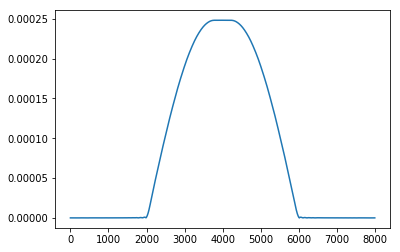

In [10]:
plt.plot(fourier_transform(basis_2, -4000, 4000))

# Text-to-bit, Bit-to-text, Bit-to-UnitEnergySignal

In [11]:
def text_to_bit(text):
    ba = bitarray.bitarray()
    ba.frombytes(text.encode('utf-8'))
    ba = np.fromiter(map(lambda x : 1 if x else 0, ba.tolist()), dtype = int)
    return ba

In [12]:
def bit_to_text(bit):
    ba = bitarray.bitarray(bit.tolist())
    r = ba.tobytes()
    return str(r,'utf-8')

In [13]:
def b_to_c(a):
    a = (a -1/2)*2
    real = np.array([a[2*i] for i in range(len(a)//2) ])
    im = np.array([1j*a[2*i+1] for i in range(len(a)//2)])
    
    return real + im

In [14]:
def c_to_b(a):
    r = np.zeros(len(a)*2)
    real = np.real(a)
    im = np.imag(a)
    for i in range (2*len(a)):
        if(i%2 == 0):
            r[i] = real[i//2]
        else : 
            r[i] = im[(i-1)//2]
            
    return (r + 1)/2

In [15]:
def transmitter(text_file):
    text_size = text_file.shape[0]
    result = 0j*np.zeros(nb_samples_root_raised + n_T * (text_size -1))
    #result+=
    for i in range(text_size) :
        #print(text_file[i]*root_raised_12_Ts_rescaled)
        result[n_T*i : nb_samples_root_raised + n_T*i] += text_file[i]*root_raised_12_Ts_rescaled
    return result
    

In [30]:
def decode_2_qam(array) : 
    size_sent = int((len(array)-nb_samples_root_raised)/n_T + 1)
    result = np.zeros(size_sent) + 1j*np.zeros(size_sent)
    for i in range (size_sent):
        a = np.sum(root_raised_12_Ts_rescaled * array[n_T*i : 200+n_T*i])
        #print(np.sign(np.imag(a)))
        result[i] = np.sign(np.real(a)) + 1j * np.sign(np.imag(a))
        #print(result[i])
        
    return result

In [31]:
def create_random(size):
    random_text =  np.sign(np.random.rand(size) -0.5)
    
    return random_text

# Appending training sequences and Transmitting

/home/const/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


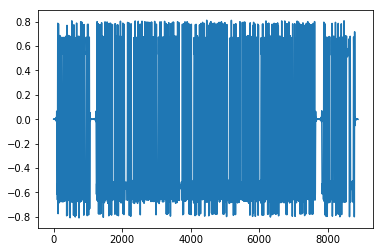

In [41]:
string_text = "Yw2gOypSJt70AcKgxH9v1QCSz4U9pjIWpdipde0H5xYcEm01JWGr7K1H5ll0eTCgYt4gv0AofyjrdYSzHncY7agwuYt5f7NuEnYjfvDzRPYHemNK4j2RhSuUn3jRCsOjr3Bur98qkYsaMxouGkHLsc6Nse4wc7pp"
random_size = int(15*len(string_text)/200)
start_random = create_random(8*random_size)
end_random = create_random(8*random_size)
constellation = b_to_c(text_to_bit(string_text))

a_transmitted = transmitter(constellation)

start_transmitted = transmitter(start_random)
end_transmitted = transmitter(end_random)
message_transmitted = np.concatenate((start_transmitted, a_transmitted, end_transmitted))
plt.plot(message_transmitted)
convolution_start = np.correlate(message_transmitted,start_transmitted , mode = 'valid')
convolution_end = np.correlate(message_transmitted,end_transmitted , mode = 'valid')
max_before_channel = np.max(convolution_start)

f_1= 3000 # first value to shift
f_2 = 7000 # second value to shift 
message_transmitted_shifted_f1 = shift(message_transmitted,f_1)
message_transmitted_shifted_f2 = shift(message_transmitted, f_2)
start_transmitted_f1 = message_transmitted_shifted_f1[:len(start_transmitted)]
end_transmitted_f1 = message_transmitted_shifted_f1[-len(end_transmitted):]
start_transmitted_f2 = message_transmitted_shifted_f2[:len(start_transmitted)]
end_transmitted_f2 = message_transmitted_shifted_f2[-len(end_transmitted):]

message_transmitted = (message_transmitted_shifted_f1 + message_transmitted_shifted_f2)
message_transmitted = np.real(message_transmitted)

In [42]:
start = np.argmax(convolution_start)+len(start_transmitted)
end = np.argmax(convolution_end)
#print(end-start)
print(a_transmitted.shape)
print(message_transmitted[start:end].shape)
print(start, end)
#plt.plot(convolution_start[100:250][60:80])

(6590,)
(6590,)
1150 7740


In [43]:
output = np.convolve(shift(root_raised_12_Ts_rescaled, 3000), message_transmitted)

In [44]:
start = np.argmax(np.correlate(output, start_transmitted_f1)) + len(start_transmitted_f1)
end = np.argmax(np.correlate(output, end_transmitted_f1))
output_truncated =  low_pass(shift(output[start:end], -f_1), 2000)
pre_message = c_to_b(decode_2_qam(-output_truncated)).astype(int)
print(bit_to_text(pre_message))

output = np.convolve(shift(root_raised_12_Ts_rescaled, 3000), message_transmitted)
    start = np.argmax(np.correlate(output, start_transmitted_f1)) + len(start_transmitted_f1)
    end = np.argmax(np.correlate(output, end_transmitted_f1))
    output_truncated = low_pass(shift(-output[start:end], -f_1), 2000)

Yw2gOypSJt70AcKgxH9v1QCSz4U9pjIWpdipde0H5xYcEm01JWGr7K1H5ll0eTCgYt4gv0AofyjrdYSzHncY7agwuYt5f7NuEnYjfvDzRPYHemNK4j2RhSuUn3jRCsOjr3Bur98qkYsaMxouGkHLsc6Nse4wc7pp


In [24]:
text = 'VrHGcHCcZzl7nM7AYFjXHlnLBvKR4LM2fEoDRLgXMxoXtwKYHOB0nqrh6afWfhS9kn3z1OvsdaEeTgZzFAlSxvyoR6w9wgOUx6uPS3sUKcx09ecZB2Khzlz7EY40PhyR'
bit_message = text_to_bit(text)
print(bit_to_text(bit_message))
c_message = b_to_c(bit_message)
m_transmitted = transmitter(c_message)

b = np.real(shift(m_transmitted,3000))
b = low_pass(shift(b,-3000),2000)
b = c_to_b(decode_2_qam(b))

print(bit_to_text(b.astype(int)))


VrHGcHCcZzl7nM7AYFjXHlnLBvKR4LM2fEoDRLgXMxoXtwKYHOB0nqrh6afWfhS9kn3z1OvsdaEeTgZzFAlSxvyoR6w9wgOUx6uPS3sUKcx09ecZB2Khzlz7EY40PhyR
VrHGcHCcZzl7nM7AYFjXHlnLBvKR4LM2fEoDRLgXMxoXtwKYHOB0nqrh6afWfhS9kn3z1OvsdaEeTgZzFAlSxvyoR6w9wgOUx6uPS3sUKcx09ecZB2Khzlz7EY40PhyR


In [25]:
np.savetxt('input.txt', message_transmitted)

In [26]:
!python3 client.py --input_file='input.txt' --output_file='output.txt' --srv_hostname=iscsrv72.epfl.ch --srv_port=80

Traceback (most recent call last):
  File "client.py", line 64, in <module>
    sock_cl.connect((args.srv_hostname, args.srv_port))
ConnectionRefusedError: [Errno 111] Connection refused


In [27]:
output = np.loadtxt('output.txt')
#output = message_transmitted

In [40]:
f_trans = fourier_transform(output,1000,9000)

norm_1 = np.linalg.norm(f_trans[:2000])
norm_2 = np.linalg.norm(f_trans[2000:4000])
norm_3 = np.linalg.norm(f_trans[4000:6000])
norm_4 = np.linalg.norm(f_trans[6000:8000])
fallen_index = np.argmin(np.array([norm_1, norm_2, norm_3, norm_4]))

print("Part {} has fallen".format(fallen_index +1 ))
print(fallen_index)

Part 4 has fallen
3


In [49]:
if fallen_index < 2:
    output = np.convolve(shift(root_raised_12_Ts_rescaled, 7000), message_transmitted)
    start = np.argmax(np.correlate(output, start_transmitted_f2)) + len(start_transmitted_f1)
    end = np.argmax(np.correlate(output, end_transmitted_f2))
    output_truncated = low_pass(shift(output[start:end], -f_2), 2000)
    
else :
    output = np.convolve(shift(root_raised_12_Ts_rescaled, 3000), message_transmitted)
    start = np.argmax(np.correlate(output, start_transmitted_f1)) + len(start_transmitted_f1)
    end = np.argmax(np.correlate(output, end_transmitted_f1))
    print(end-start)
    output_truncated = low_pass(shift(output[start:end], -f_1), 2000)
    

pre_message = c_to_b(decode_2_qam(-output_truncated)).astype(int)
print(bit_to_text(pre_message))

6590
Yw2gOypSJt70AcKgxH9v1QCSz4U9pjIWpdipde0H5xYcEm01JWGr7K1H5ll0eTCgYt4gv0AofyjrdYSzHncY7agwuYt5f7NuEnYjfvDzRPYHemNK4j2RhSuUn3jRCsOjr3Bur98qkYsaMxouGkHLsc6Nse4wc7pp


In [ ]:
#start = np.argmax(convolution_start - norm_start*convolved_norm_output) + len(transformed_start)//2
#end = np.argmax(convolution_end - norm_end*convolved_norm_output) - len(transformed_start)//2
start = np.argmax(np.abs(convolution_start))+len(start_transmitted)
end =  np.argmax(np.abs(convolution_end))
print(start, end)

In [ ]:
print(len(start_transmitted))

In [ ]:
##### qam
def qam(array):
    pad_val = int(T//T_s)
    int_size = pad_val + f_s
    
    loop_size = len(array)//2
    
    result = np.zeros(loop_size*int_size)
    
    for i in range(loop_size) : 
        r1 = array[2*i]*basis()
        r1 =  np.pad(r1, (0,pad_val) ,'constant', constant_values = (0))
        #need to pad to add 0 at the begining
        
        r2  = array[2*i+1]*basis()
        r2 =  np.pad(r2, (pad_val,0) ,'constant', constant_values = (0))
        r = r1+r2
        result[i*int_size : (i+1)*int_size ] = r
        
    return result

In [ ]:
a = [1,-1,1]
qam(a)